In [ ]:
## Seaborn

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
print(x.shape)
print(y.shape)

plt.plot(x, y)
plt.legend('ABCDEF', ncol = 2, loc = 'upper left')

# Seaborn
import seaborn as sns
sns.set()

plt.plot(x, y)
plt.legend('ABCDEF', ncol = 2, loc = 'upper left')

# ----------------------------------------------------
### 1.频次直方图，KDE，密度图、
# ----------------------------------------------------
data = np.random.multivariate_normal([0, 1], [[5, 2], [2, 2]], size = 2000)
data = pd.DataFrame(data, columns = ['x', 'y'])
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    print(data)

for col in 'xy':
    plt.hist(data[col], density = True, alpha = 0.5)

for col in 'xy':
    sns.kdeplot(data[col], shade = True)

sns.distplot(data['x'])
sns.distplot(data['y'])

sns.kdeplot(data)

with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind = 'kde')

with sns.axes_style('white'):
    sns.jointplot(x = 'x', y = 'y', data = data, kind = 'hex')

# ----------------------------------------------------
### 2.矩阵图
# ----------------------------------------------------
iris = sns.load_dataset('iris')
iris.head()

sns.pairplot(iris, hue = 'species', size = 2)

# ----------------------------------------------------
### 3.分面频次直方图
# ----------------------------------------------------
tips = sns.load_dataset('tips')
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    print(tips)

tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
print(tips.head())
grid = sns.FacetGrid(tips, row = 'sex', col = 'time', margin_titles = True)
grid.map(plt.hist, 'tip_pct', bins = np.linspace(0, 40, 15))

# ----------------------------------------------------
### 4.因子图
# ----------------------------------------------------
with sns.axes_style(style = 'ticks'):
    g = sns.factorplot(x = 'day', y = 'total_bill', hue = 'sex', data = tips, kind = 'box')
    g.set_axis_labels('Day', 'Total Bill')

# ----------------------------------------------------
### 5.联合分布
# ----------------------------------------------------
with sns.axes_style('white'):
    sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'scatter')

sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg')

# ----------------------------------------------------
### 6.条形图
# ----------------------------------------------------
planets = sns.load_dataset('planets')
planets.head()

with sns.axes_style('white'):
    g = sns.factorplot(x = 'year', data = planets, aspect = 2, kind = 'count', color = 'steelblue')
    g.set_xticklabels(step = 5)

with sns.axes_style('white'):
    g = sns.factorplot(x = 'year', data = planets, 
                       aspect = 4.0, 
                       kind = 'count', 
                       hue = 'method', 
                       order = range(2001, 2015))


* seaborn内容架构
    * 关系（Relational）
        - 散点图
        - 线形图
    * 分类（Categorical）
    * 分布（Distribution）
    * 回归（Regression）
    * Multiples
    * 风格（Style）
    * 颜色（Color）

# 1.统计关系

> 连续性变量 vs 连续性变量

* 函数
    - relplot(x, y, kind, sort, ci, estimator, hue, style, size, palette, data)
    - relplot(x, y, hue, style, size, palette, data, kind = "scatter")
        - scatterplot()
    - relplot(x, y, sort, ci, estimator, hue, style, size, palette, data, kind = "line")
        - lineplot()

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

In [7]:
# data
tips = sns.load_dataset("tips")
tips.head(6)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


In [39]:
# data2 
df = pd.DataFrame({
    "time": np.arange(500),
    "value": np.random.randn(500).cumsum()
})
df.head(6)

,time,value
0,0,0.700045
1,1,0.774605
2,2,0.682797
3,3,-0.127763
4,4,1.872095
5,5,1.081622


## 1.1 散点图

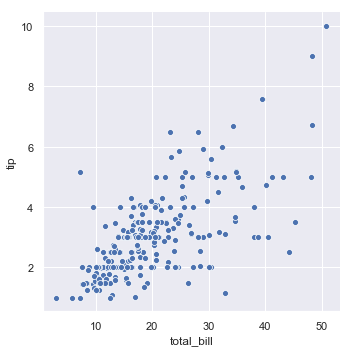

In [8]:
sns.relplot(x = "total_bill", y = "tip", data = tips);

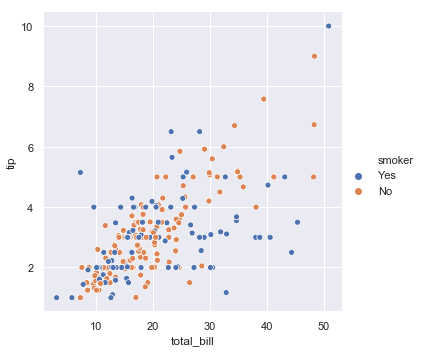

In [11]:
sns.relplot(x = "total_bill", y = "tip", hue = "smoker", data = tips);

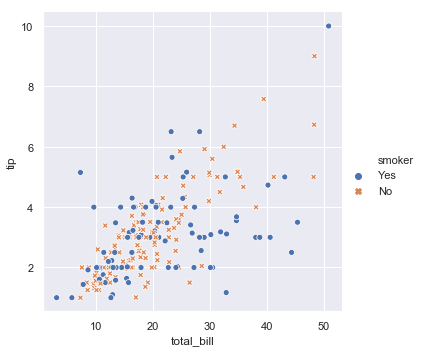

In [10]:
sns.relplot(x = "total_bill", y = "tip", hue = "smoker", style = "smoker", data = tips);

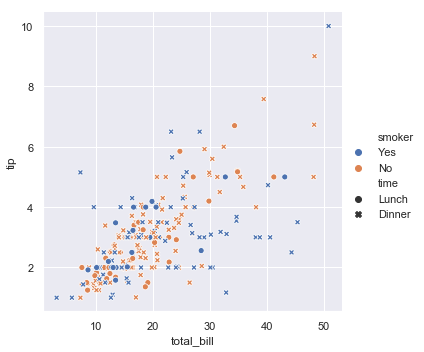

In [12]:
sns.relplot(x = "total_bill", y = "tip", hue = "smoker", style = "time", data = tips);

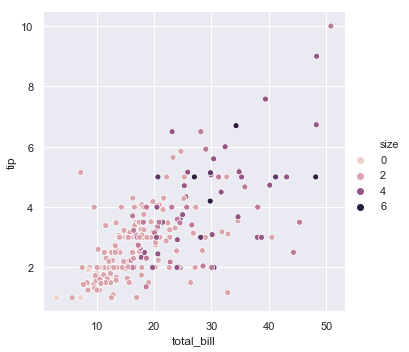

In [14]:
sns.relplot(x = "total_bill", y = "tip", hue = "size", data = tips);

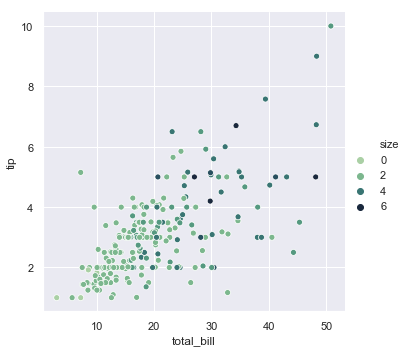

In [16]:
sns.relplot(x = "total_bill", y = "tip", hue = "size", palette = "ch:r=-0.5,l=0.75", data = tips);

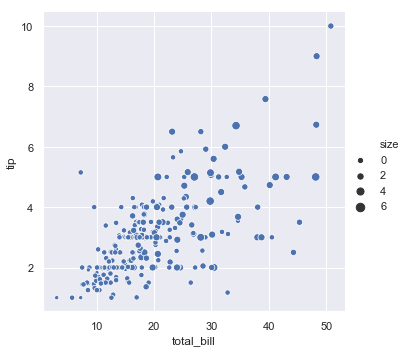

In [17]:
sns.relplot(x = "total_bill", y = "tip", size = "size", data = tips);

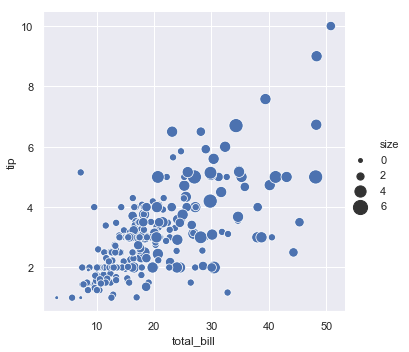

In [18]:
sns.relplot(x = "total_bill", y = "tip", size = "size", sizes = (15, 200), data = tips);

## 1.2 线形图

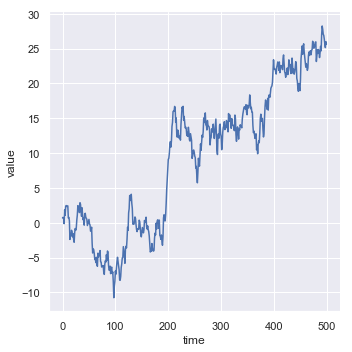

In [40]:
sns.relplot(x = "time", y = "value", kind = "line", data = df);

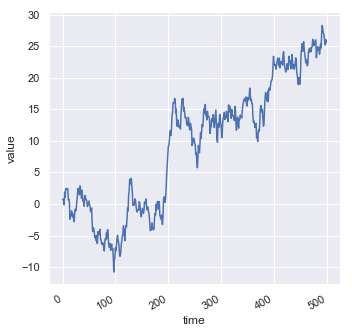

In [41]:
g = sns.relplot(x = "time", y = "value", kind = "line", data = df)
g.fig.autofmt_xdate()

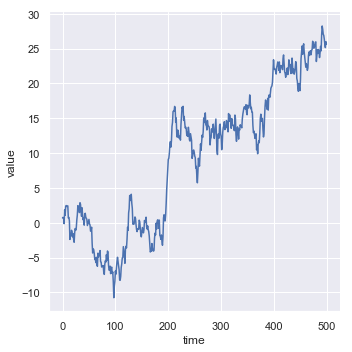

In [42]:
sns.relplot(x = "time", y = "value", sort = False, kind = "line", data = df);

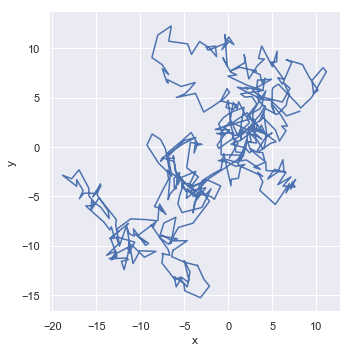

In [43]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis = 0), columns = ["x", "y"])
sns.relplot(x = 'x', y = "y", sort = False, kind = "line", data = df);

In [44]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


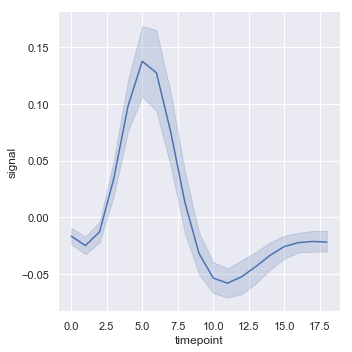

In [50]:
# 均值和95%的置信区间
sns.relplot(x = "timepoint", y = "signal", kind = "line", data = fmri);

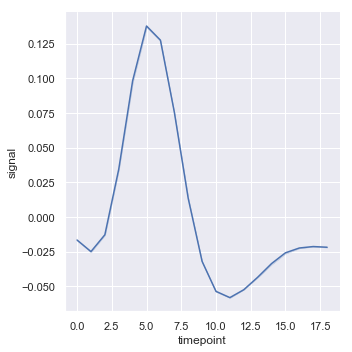

In [47]:
sns.relplot(x = "timepoint", y = "signal", ci = False, kind = "line", data = fmri);

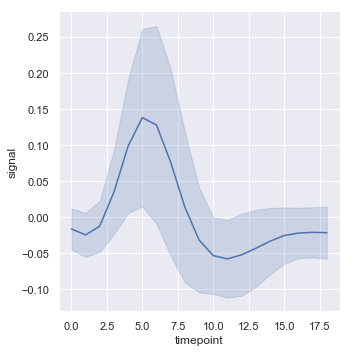

In [49]:
sns.relplot(x = "timepoint", y = "signal", kind = "line", ci = "sd", data = fmri);

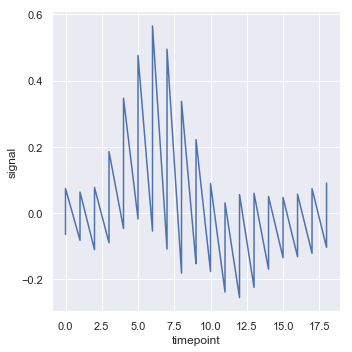

In [52]:
sns.relplot(x = "timepoint", y = "signal", estimator = None, kind = "line", data = fmri);

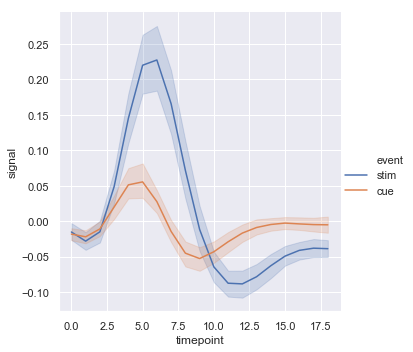

In [53]:
sns.relplot(x = "timepoint", y = "signal", hue = "event", kind = "line", data = fmri);

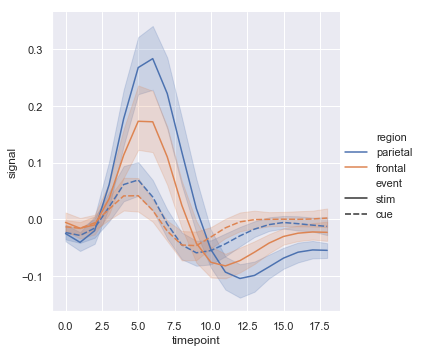

In [54]:
sns.relplot(x = "timepoint", y = "signal", hue = "region", style = "event", kind = "line", data = fmri);

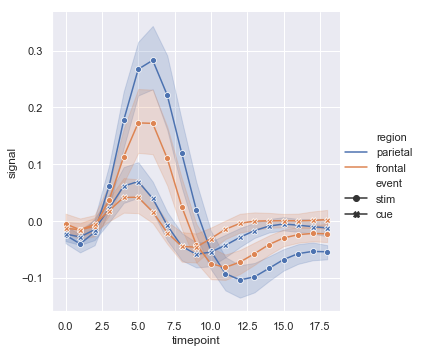

In [56]:
sns.relplot(x = "timepoint", y = "signal", 
           hue = "region", 
           style = "event", 
           dashes = False, 
           markers = True, 
           kind = "line", 
           data = fmri);

# 2.类别型数据

> 类别型数据（离散的组） vs 连续型数据

* 函数
    - catplot()
        - 类别散点图
            - catplot(kind = "strip")
                - stripplot()
            - catplot(kind = "swarm")
                - swarmplot()
        - 类别分布图
            - catplot(kind = "box")
                - boxplot()
            - catplot(kind = "violin")
                - violinplot()
            - catplot(kind = "boxen")
                - boxenplot()
        - 类别估计图
            - catplot(kind = "point")
                - pointplot()
            - catplot(kind = "bar")
                - barplot()
            - catplot(kind = "count")
                - countplot()

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "ticks", color_codes = True)

# 3.数据分布图

* 函数
    - distplot()
    - kdeplot()
        - 直方图
        - 核密度估计(KDE)
    - jointplot()
    - rugplot()
    - pairplot()

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes = True)